In [1]:
import import_ipynb
import json
import numpy as np
import pandas as pd
import torch as pt
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from glob import glob
from classes_funcs import *

importing Jupyter notebook from classes_funcs.ipynb


In [4]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
  
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
  
model = AutoModelForMaskedLM.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [6]:
tokenizer

PreTrainedTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [2]:
training_files = sorted(glob("input_data/*.txt"))
validation_files = sorted(glob('./validation/*.txt'))
training_inter, val_inter = find_intersections(training_files, validation_files)

In [3]:
print(len(training_inter), len(val_inter))

716 716


In [4]:
training_data = []
for idx,doc in enumerate(training_inter):
    with open( doc, "r") as file: 
        invoice = []
        for i, line in enumerate(file):
            x = line.split(',')
            label = ','.join(x[8:])[:-1]
            invoice += (label.split(" "))
#             print(invoice[i])
    training_data.append(invoice)

In [5]:
val_data = []
for i in val_inter:
    val_data.append(json_to_df(i)['total'])
val_data = conv_array_float(val_data)

In [6]:
#missing data from validation being filled in manually after looking at the actual amount in the receipt
val_data[38] = 8.2

In [7]:
val_data

[9.0,
 60.3,
 33.9,
 80.9,
 30.9,
 31.0,
 327.0,
 20.0,
 112.45,
 26.6,
 14.1,
 15.0,
 15.9,
 15.0,
 32.7,
 15.9,
 73.0,
 39.8,
 73.0,
 86.0,
 54.5,
 4.9,
 9.0,
 27.55,
 55.1,
 18.0,
 18.0,
 153.35,
 153.35,
 37.1,
 37.1,
 2.5,
 2.5,
 21.2,
 21.2,
 8.2,
 75.0,
 8.2,
 8.2,
 332.3,
 8.2,
 8.2,
 57.8,
 13.1,
 189.75,
 343.95,
 174.9,
 64.15,
 190.0,
 8.6,
 6.9,
 28.6,
 170.0,
 100.9,
 8.0,
 593.1,
 7.6,
 10.0,
 9.2,
 13.8,
 8.2,
 8.7,
 7.1,
 8.2,
 7.6,
 77.2,
 129.3,
 11.4,
 85.54,
 88.17,
 65.2,
 8.2,
 53.55,
 3.2,
 9.9,
 141.5,
 17.7,
 49.4,
 79.5,
 102.0,
 159.0,
 12.0,
 23.25,
 92.8,
 15.9,
 10.4,
 3.9,
 277.0,
 18.8,
 5.9,
 9.9,
 9.9,
 37.8,
 37.8,
 538.0,
 538.0,
 99.8,
 99.8,
 7.0,
 7.0,
 5.0,
 5.0,
 5.0,
 85.1,
 85.1,
 85.1,
 83.0,
 83.0,
 83.0,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 31.45,
 9.65,
 21.0,
 42.4,
 47.7,
 7.42,
 29.68,
 73.3,
 148.4,
 102.4,
 30.3,
 599.45,
 48.15,
 7.0,
 7.0,
 6.0,
 465.34,
 4.0,
 93.07,
 44.73,
 23.32,
 116.28,
 94.87,
 13.25,
 2.12,
 6.36,
 21.2,
 1

In [8]:
training_data

[['TAN',
  'WOON',
  'YANN',
  'BOOK',
  'TA',
  '.K(TAMAN',
  'DAYA)',
  'SDN',
  'BND',
  '789417-W',
  'NO.53',
  '55,57',
  '&',
  '59,',
  'JALAN',
  'SAGU',
  '18,',
  'TAMAN',
  'DAYA,',
  '81100',
  'JOHOR',
  'BAHRU,',
  'JOHOR.',
  'DOCUMENT',
  'NO',
  ':',
  'TD01167104',
  'DATE:',
  '25/12/2018',
  '8:13:39',
  'PM',
  'CASHIER:',
  'MANIS',
  'MEMBER:',
  'CASH',
  'BILL',
  'CODE/DESC',
  'PRICE',
  'DISC',
  'AMOUNT',
  'QTY',
  'RM',
  'RM',
  '9556939040116',
  'KF',
  'MODELLING',
  'CLAY',
  'KIDDY',
  'FISH',
  '1',
  'PC',
  '*',
  '9.000',
  '0.00',
  '9.00',
  'TOTAL:',
  'ROUR',
  'DING',
  'ADJUSTMENT:',
  '0.00',
  'ROUND',
  'D',
  'TOTAL',
  '(RM):',
  '9.00',
  'CASH',
  '10.00',
  'CHANGE',
  '1.00',
  'GOODS',
  'SOLD',
  'ARE',
  'NOT',
  'RETURNABLE',
  'OR',
  'EXCHANGEABLE',
  '***',
  '***',
  'THANK',
  'YOU',
  'PLEASE',
  'COME',
  'AGAIN',
  '!',
  '9.00'],
 ['TAN',
  'WOON',
  'YANN',
  'INDAH',
  'GIFT',
  '&',
  'HOME',
  'DECO',
  '27,JALAN

In [9]:
def rm_extra_char(lab_arr):
    arr1 = []
    for i, x in enumerate(lab_arr):
        if(re.sub(r'[^A-Z0-9]', '', x).isnumeric()):
            arr1.append(x)
#             continue
        elif(re.sub(r'[^A-Z0-9]', '', x).isalnum()):
            arr1 += ((re.sub(r'[^A-Z0-9]', ' ', x)).split(" "))
        
    return([x for x in arr1 if x != ""])

In [10]:
cleaned_training_data = []
for inv in training_data:
    cleaned_training_data.append(rm_extra_char(inv))

In [11]:
# re.sub(r'[^A-Z0-9]', '', '822737').isalpha()

In [12]:
cleaned_training_data

[['TAN',
  'WOON',
  'YANN',
  'BOOK',
  'TA',
  'K',
  'TAMAN',
  'DAYA',
  'SDN',
  'BND',
  '789417',
  'W',
  'NO',
  '53',
  '55,57',
  '59,',
  'JALAN',
  'SAGU',
  '18,',
  'TAMAN',
  'DAYA',
  '81100',
  'JOHOR',
  'BAHRU',
  'JOHOR',
  'DOCUMENT',
  'NO',
  'TD01167104',
  'DATE',
  '25/12/2018',
  '8:13:39',
  'PM',
  'CASHIER',
  'MANIS',
  'MEMBER',
  'CASH',
  'BILL',
  'CODE',
  'DESC',
  'PRICE',
  'DISC',
  'AMOUNT',
  'QTY',
  'RM',
  'RM',
  '9556939040116',
  'KF',
  'MODELLING',
  'CLAY',
  'KIDDY',
  'FISH',
  '1',
  'PC',
  '9.000',
  '0.00',
  '9.00',
  'TOTAL',
  'ROUR',
  'DING',
  'ADJUSTMENT',
  '0.00',
  'ROUND',
  'D',
  'TOTAL',
  'RM',
  '9.00',
  'CASH',
  '10.00',
  'CHANGE',
  '1.00',
  'GOODS',
  'SOLD',
  'ARE',
  'NOT',
  'RETURNABLE',
  'OR',
  'EXCHANGEABLE',
  'THANK',
  'YOU',
  'PLEASE',
  'COME',
  'AGAIN',
  '9.00'],
 ['TAN',
  'WOON',
  'YANN',
  'INDAH',
  'GIFT',
  'HOME',
  'DECO',
  '27',
  'JALAN',
  'DEDAP',
  '13,',
  'TAMAN',
  'JOHO

In [13]:
# def bag_of_words(inv_arr):

d = defaultdict(int)
for inv in cleaned_training_data:
    for i in inv: 
        if(i.isalpha()):
            d[i] += 1
print(d)



defaultdict(<class 'int'>, {'TAN': 10, 'WOON': 6, 'YANN': 5, 'BOOK': 24, 'TA': 8, 'K': 91, 'TAMAN': 171, 'DAYA': 2, 'SDN': 514, 'BND': 1, 'W': 126, 'NO': 1517, 'JALAN': 684, 'SAGU': 1, 'JOHOR': 159, 'BAHRU': 71, 'DOCUMENT': 6, 'DATE': 476, 'PM': 119, 'CASHIER': 335, 'MANIS': 6, 'MEMBER': 34, 'CASH': 844, 'BILL': 110, 'CODE': 206, 'DESC': 37, 'PRICE': 277, 'DISC': 97, 'AMOUNT': 709, 'QTY': 587, 'RM': 1657, 'KF': 1, 'MODELLING': 1, 'CLAY': 1, 'KIDDY': 1, 'FISH': 18, 'PC': 11, 'TOTAL': 2200, 'ROUR': 1, 'DING': 1, 'ADJUSTMENT': 155, 'ROUND': 65, 'D': 286, 'CHANGE': 516, 'GOODS': 354, 'SOLD': 266, 'ARE': 337, 'NOT': 248, 'RETURNABLE': 199, 'OR': 30, 'EXCHANGEABLE': 19, 'THANK': 500, 'YOU': 521, 'PLEASE': 367, 'COME': 334, 'AGAIN': 341, 'INDAH': 85, 'GIFT': 3, 'HOME': 3, 'DECO': 4, 'DEDAP': 2, 'JAYA': 209, 'TEL': 401, 'FAX': 180, 'RECEIPT': 224, 'CN': 2, 'LOCATION': 1, 'SP': 11, 'MB': 1, 'ROOM': 1, 'ITEM': 439, 'AMT': 338, 'ST': 35, 'PRIVILEGE': 1, 'CARD': 59, 'GD': 1, 'GF': 3, 'TABLE': 59, 

In [14]:
sorted_d = sorted(d.items(), key=lambda item: item[1])
sorted_d

[('BND', 1),
 ('SAGU', 1),
 ('KF', 1),
 ('MODELLING', 1),
 ('CLAY', 1),
 ('KIDDY', 1),
 ('ROUR', 1),
 ('DING', 1),
 ('LOCATION', 1),
 ('MB', 1),
 ('ROOM', 1),
 ('PRIVILEGE', 1),
 ('GD', 1),
 ('LAMP', 1),
 ('STITCH', 1),
 ('FLEASE', 1),
 ('AOSIN', 1),
 ('DEALING', 1),
 ('TERBAU', 1),
 ('WAXCO', 1),
 ('WINDSHILED', 1),
 ('BOPP', 1),
 ('FZ', 1),
 ('YONGFATT', 1),
 ('ELEGANT', 1),
 ('SCHTR', 1),
 ('RFG', 1),
 ('NILAI', 1),
 ('SHINE', 1),
 ('WAX', 1),
 ('EW', 1),
 ('MOO', 1),
 ('KLEENSO', 1),
 ('AJAIB', 1),
 ('SERAI', 1),
 ('WANYI', 1),
 ('WDOO', 1),
 ('HANDKERCHIEF', 1),
 ('UPERATOR', 1),
 ('HO', 1),
 ('MACHINERY', 1),
 ('SRIPUTRA', 1),
 ('REPAIR', 1),
 ('WORKMANSHIP', 1),
 ('OVERFLOW', 1),
 ('ASSY', 1),
 ('GREASE', 1),
 ('TOOLS', 1),
 ('AKODA', 1),
 ('CHAMPION', 1),
 ('TALI', 1),
 ('COTIN', 1),
 ('MOTOR', 1),
 ('KURAU', 1),
 ('PENGERANG', 1),
 ('CROCS', 1),
 ('TUBES', 1),
 ('ROOT', 1),
 ('PID', 1),
 ('PROWESS', 1),
 ('XTRASEAL', 1),
 ('RTV', 1),
 ('ACETIC', 1),
 ('CENTRAL', 1),
 ('MARKSMA

<module 'matplotlib.pyplot' from 'C:\\Users\\pinka\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

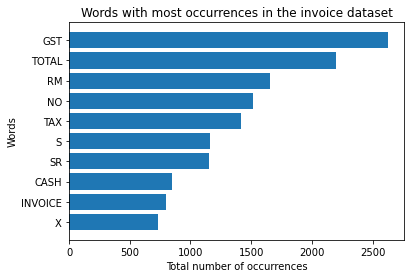

In [15]:
def plt_top_n_occ(n, sort_word_dict_dd):
    if n > len(sort_word_dict_dd):
        return("n is too big")
    
    sliced_d = np.array(sort_word_dict_dd[-n:])
    
    
    plt.barh(sliced_d[:,0], sliced_d[:,1].astype(np.int))
    plt.title(label = "Words with most occurrences in the invoice dataset")
    plt.xlabel("Total number of occurrences")
    plt.ylabel("Words")
    
    return(plt)
plt_top_n_occ(10, sorted_d)


In [16]:
def tf(word, document):
    return (document.count(word)) / len(document)

tf('RM', training_data[0])

0.023529411764705882

In [17]:
def df(word, docs):
    doc_freq = 0
    for i in docs:
        if tf(word, i) > 0:
            doc_freq += 1
    return(doc_freq)

df('RM', training_data)

224

In [18]:
def idf(word, docs):
    n = len(docs)
    return(np.log((1+n)/(1+df(word, docs))+1))

In [19]:
idf('RM', training_data)

1.431904872371943

In [20]:
grouped_data = []
for i in cleaned_training_data:
    grouped_data.append(" ".join(i))
grouped_data

['TAN WOON YANN BOOK TA K TAMAN DAYA SDN BND 789417 W NO 53 55,57 59, JALAN SAGU 18, TAMAN DAYA 81100 JOHOR BAHRU JOHOR DOCUMENT NO TD01167104 DATE 25/12/2018 8:13:39 PM CASHIER MANIS MEMBER CASH BILL CODE DESC PRICE DISC AMOUNT QTY RM RM 9556939040116 KF MODELLING CLAY KIDDY FISH 1 PC 9.000 0.00 9.00 TOTAL ROUR DING ADJUSTMENT 0.00 ROUND D TOTAL RM 9.00 CASH 10.00 CHANGE 1.00 GOODS SOLD ARE NOT RETURNABLE OR EXCHANGEABLE THANK YOU PLEASE COME AGAIN 9.00',
 'TAN WOON YANN INDAH GIFT HOME DECO 27 JALAN DEDAP 13, TAMAN JOHOR JAYA 81100 JOHOR BAHRU JOHOR TEL 07 3507405 FAX 07 3558160 RECEIPT 19/10/2018 20:49:59 #01 CASHIER CN LOCATION SP 05 /0531 MB MO26588 ROOM NO 01 050100035279 DESC ITEM QTY PRICE AMT RM ST PRIVILEGE CARD GD INDAH 88888 1 10.00 10.00 GF TABLE LAMP STITCH I 62483 1 55.90 55.90 DISC 10.00% -5.59 TOTAL QTY 2 TOTAL AMT RM 60.31 ROUNDING ADJ -0.01 RM 60.30 CASH RM 70.30 CHANGE RM 10.00 THANK YOU PLEASE COME AGAIN GOODS SOLD ARE NOT RETURNABLE THANK YOU FLEASE COME AOSIN GOO

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


vect = TfidfVectorizer()
X = vect.fit_transform(grouped_data)
# print(vect.get_feature_names())
print(X.shape)

vect.idf_

(716, 7551)


array([1.09503128, 5.01012648, 4.39702201, ..., 6.88192866, 6.88192866,
       6.88192866])

In [22]:
X.shape

(716, 7551)